<a href="https://colab.research.google.com/github/sajedehfarahbod/deep-learning-for-cell-culture/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
data = pd.read_csv("data1.csv")
data

,Mu,Dl,Lb,Tcyc,YFP,schnitzNum
0,2.212869,1.756951,2.035147,25.325000,106.822445,95
1,2.145022,1.322694,2.725876,15.191667,110.307318,96
2,2.187034,1.976408,1.908797,28.533333,108.416709,97
3,1.902761,1.642699,2.023156,26.191667,115.020217,105
4,2.288025,2.117081,2.064866,28.200000,117.617110,107
...,...,...,...,...,...,...
1214,0.575907,1.251254,1.131423,113.416667,442.308698,3037
1215,1.135137,1.590728,1.171979,59.466667,226.018277,3120
1216,1.217607,1.676881,1.575631,50.575000,146.294287,3122
1217,0.759511,1.286445,1.253480,72.666667,475.679082,3123


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Mu          1219 non-null   float64
 1   Dl          1219 non-null   float64
 2   Lb          1219 non-null   float64
 3   Tcyc        1219 non-null   float64
 4   YFP         1219 non-null   float64
 5   schnitzNum  1219 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 57.3 KB


In [ ]:
data.describe()

,Mu,Dl,Lb,Tcyc,YFP,schnitzNum
count,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000
mean,1.628015,1.651759,1.817942,50.214479,213.592913,1483.433962
std,0.716365,0.583669,0.479718,44.599995,233.858653,797.590470
min,0.149448,0.318124,0.813265,12.491667,-13.219512,95.000000
25%,0.964104,1.150776,1.384697,26.316667,14.376724,792.500000
50%,1.920696,1.579605,1.877603,31.466667,119.862253,1521.000000
75%,2.223870,2.106683,2.182502,52.691667,365.426252,2127.500000
max,2.881788,4.078753,3.824417,332.791667,1066.610168,3152.000000


array([[<Axes: title={'center': 'Mu'}>, <Axes: title={'center': 'Dl'}>],
       [<Axes: title={'center': 'Lb'}>, <Axes: title={'center': 'Tcyc'}>],
       [<Axes: title={'center': 'YFP'}>,
        <Axes: title={'center': 'schnitzNum'}>]], dtype=object)

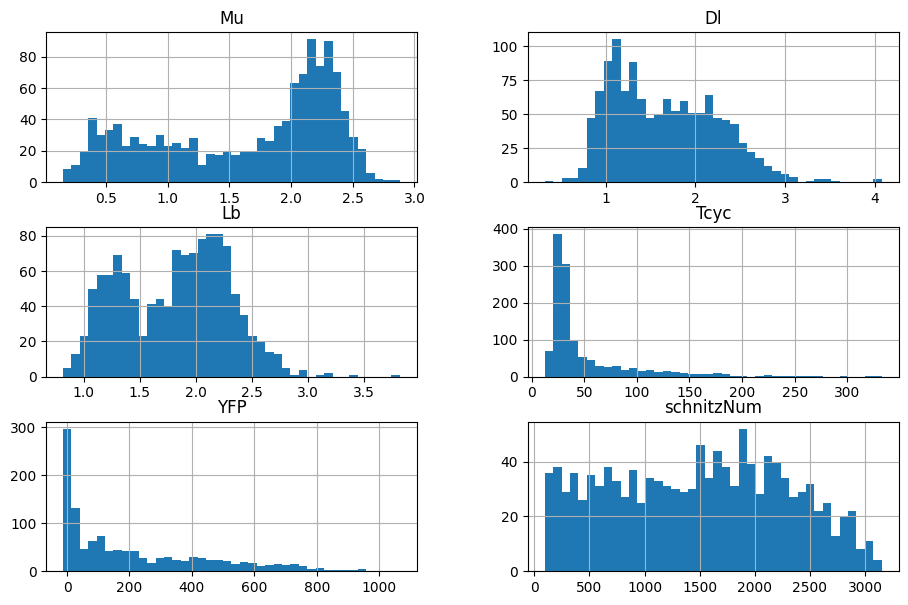

In [ ]:
data.hist(bins=40, figsize=(11,7))

In [ ]:
X = data.iloc[:, :-1].values  # All columns except the last one (features)
y = data.iloc[:, -1].values   # The last column (target)

In [ ]:
# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Reshape to (N, 1)

In [ ]:
# Create a dataset and split it into train and test sets
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class CellCultureModel(nn.Module):
    def __init__(self):
        super(CellCultureModel, self).__init__()
        self.fc1 = nn.Linear(5, 64)  # Update this to 5 input features
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model with the correct input size
model = CellCultureModel()



In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        print(f"Input shape: {inputs.shape}")
        print(f"Target shape: {targets.shape}")

        # No need to reshape inputs here since the model now expects 5 features
        # inputs = inputs.view(-1, 5)  # Already [batch_size, 5]

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass

        # Check output shape as well
        print(f"Output shape: {outputs.shape}")

        loss = criterion(outputs, targets)  # Compute the loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update the weights

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


Streaming output truncated to the last 5000 lines.
Target shape: torch.Size([32, 1])
Output shape: torch.Size([32, 1])
Input shape: torch.Size([32, 5])
Target shape: torch.Size([32, 1])
Output shape: torch.Size([32, 1])
Input shape: torch.Size([32, 5])
Target shape: torch.Size([32, 1])
Output shape: torch.Size([32, 1])
Input shape: torch.Size([32, 5])
Target shape: torch.Size([32, 1])
Output shape: torch.Size([32, 1])
Input shape: torch.Size([32, 5])
Target shape: torch.Size([32, 1])
Output shape: torch.Size([32, 1])
Input shape: torch.Size([15, 5])
Target shape: torch.Size([15, 1])
Output shape: torch.Size([15, 1])
Epoch [47/100], Loss: 280627.0257
Input shape: torch.Size([32, 5])
Target shape: torch.Size([32, 1])
Output shape: torch.Size([32, 1])
Input shape: torch.Size([32, 5])
Target shape: torch.Size([32, 1])
Output shape: torch.Size([32, 1])
Input shape: torch.Size([32, 5])
Target shape: torch.Size([32, 1])
Output shape: torch.Size([32, 1])
Input shape: torch.Size([32, 5])
Target

In [ ]:
model.eval()  # Set the model to evaluation mode
test_loss = 0.0
actual_values = []
predicted_values = []
with torch.no_grad():  # No need to compute gradients during evaluation
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

        actual_values.extend(targets.numpy())
        predicted_values.extend(outputs.numpy())
print(f'Mean Test Loss: {test_loss/len(test_loader):.4f}')


Mean Test Loss: 216128.6836


In [ ]:
model = nn.Sequential(
    nn.Linear(6, 64),  # Adjusted input size
    nn.ReLU(),
    # ... other layers
)


In [ ]:
# Example: Predicting on new data (replace with your data)
new_data = torch.tensor([[0.5, 0.2, 0.8, 0.3, 0.7, 0.1]], dtype=torch.float32)
model.eval()
with torch.no_grad():
    prediction = model(new_data)
    print(f'Prediction: {prediction}')




Prediction: tensor([[0.4402, 0.2402, 0.5553, 0.0000, 0.0000, 0.3251, 0.3432, 0.0000, 0.2734,
         0.0000, 0.2455, 0.0000, 0.0000, 0.0000, 0.0000, 0.3814, 0.0000, 0.0000,
         0.0000, 1.0846, 0.0000, 0.6504, 0.0000, 0.0000, 0.5362, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.5433, 0.2949, 0.2900, 0.0000, 0.0000, 0.1995,
         0.1412, 0.0525, 0.0000, 0.0000, 0.4402, 0.4059, 0.3213, 0.1190, 0.0000,
         0.1541, 0.1227, 0.0000, 0.0000, 0.0161, 0.0000, 0.1547, 0.0000, 0.0000,
         0.3497, 0.2912, 0.0000, 0.0000, 0.0000, 0.0957, 0.5742, 0.3460, 0.5508,
         0.0000]])


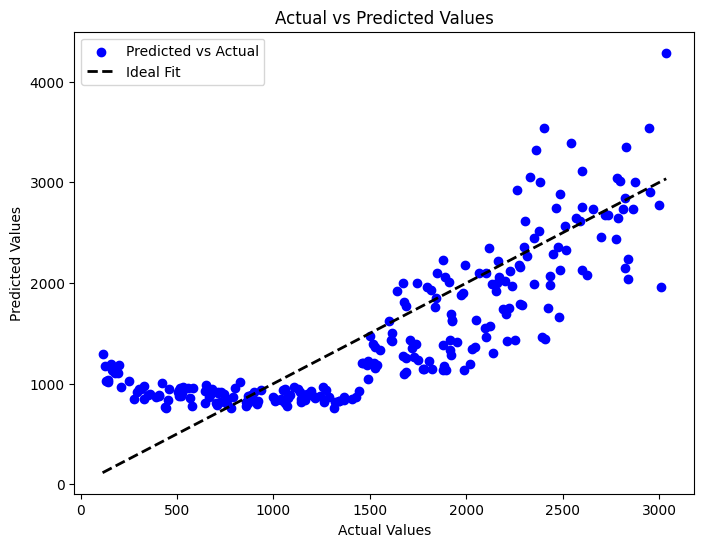

In [ ]:
# Convert lists to numpy arrays for plotting
actual_values = np.array(actual_values)
predicted_values = np.array(predicted_values)

# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, color='blue', label='Predicted vs Actual')
plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

